In [ ]:
%pwd
%ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive/dl
%pwd
%ls

/content/drive/MyDrive/dl
'Final Model_Fast_Faster_RCNN.ipynb'   runs/                    videos/      YOLOv8m5k.pt
 FinalProject-YOLOv8.ipynb             udacity-car-dataset-1/   yolo11n.pt   yolov8m.pt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2  # For image processing
import torch  # If you're using PyTorch
import torchvision.transforms as transforms


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 22.9 MB/s eta 0:00:00


In [ ]:
#data set is already extracted no need to run next time
'''!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="smt5GvTxQqbYO8hBiKtq")
project = rf.workspace("ajaykumar-t9dpy").project("udacity-car-dataset-trbuh")
version = project.version(1)
dataset = version.download("yolov8")'''


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to udacity-car-dataset-1 in yolov8:: 100%|██████████| 12776/12776 [01:43<00:00, 123.14it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


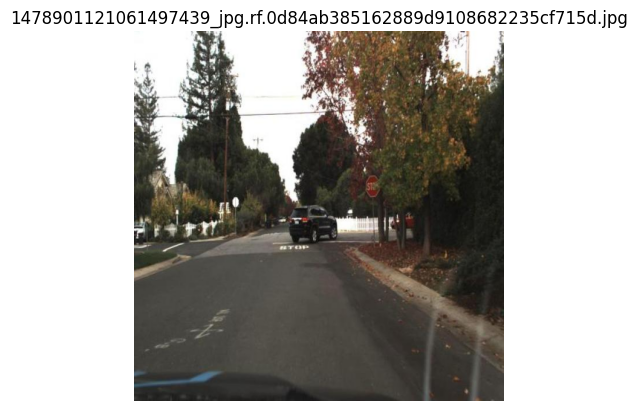

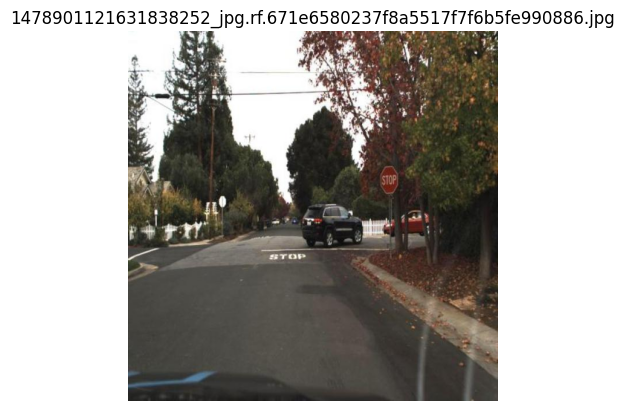

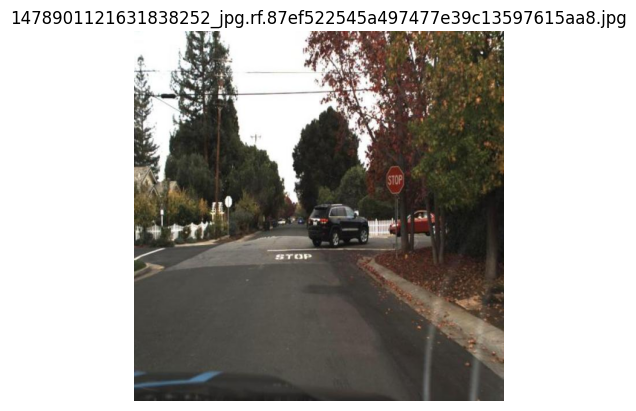

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Set up the path to the image folder
images_path = 'udacity-car-dataset-1/train/images'

# List a few image files
sample_images = os.listdir(images_path)[:3]  # Adjust the number of samples as needed

# Display the images
for img_file in sample_images:
    img_path = os.path.join(images_path, img_file)
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


In [ ]:
import os
import random

# Define base directories for images and labels
base_dir = 'udacity-car-dataset-1'
image_dirs = {
    'train': os.path.join(base_dir, 'train', 'images'),
    'valid': os.path.join(base_dir, 'valid', 'images'),
    'test': os.path.join(base_dir, 'test', 'images')
}
label_dirs = {
    'train': os.path.join(base_dir, 'train', 'labels'),
    'valid': os.path.join(base_dir, 'valid', 'labels'),
    'test': os.path.join(base_dir, 'test', 'labels')
}

# Function to verify image-label pairs in a sample
def verify_random_samples(image_dir, label_dir, split_name, sample_size=5):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

    print(f"Checking random samples in {split_name} split:")
    # Select a random sample of image files
    random_samples = random.sample(image_files, min(sample_size, len(image_files)))

    unmatched_images = []
    unmatched_labels = []

    # Check if each sampled image has a corresponding label
    for img in random_samples:
        label_name = img.replace('.jpg', '.txt')
        if label_name not in label_files:
            unmatched_images.append(img)

    # Check if any labels do not have corresponding images
    random_samples_labels = random.sample(label_files, min(sample_size, len(label_files)))
    for lbl in random_samples_labels:
        image_name = lbl.replace('.txt', '.jpg')
        if image_name not in image_files:
            unmatched_labels.append(lbl)

    if unmatched_images:
        print(f"Unmatched images (no corresponding label): {unmatched_images}")
    else:
        print("All sampled images have corresponding labels.")

    if unmatched_labels:
        print(f"Unmatched labels (no corresponding image): {unmatched_labels}")
    else:
        print("All sampled labels have corresponding images.")

    print("-" * 40)

# Verify random samples in train, valid, and test directories
for split in ['train', 'valid', 'test']:
    verify_random_samples(image_dirs[split], label_dirs[split], split)


Checking random samples in train split:
All sampled images have corresponding labels.
All sampled labels have corresponding images.
----------------------------------------
Checking random samples in valid split:
All sampled images have corresponding labels.
All sampled labels have corresponding images.
----------------------------------------
Checking random samples in test split:
All sampled images have corresponding labels.
All sampled labels have corresponding images.
----------------------------------------


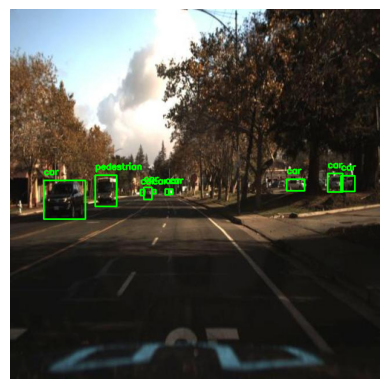

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Paths to your images and labels folders
images_path = 'udacity-car-dataset-1/test/images'
labels_path = 'udacity-car-dataset-1/test/labels'

# Function to display image with bounding boxes
def display_image_with_boxes(image_path, label_path, class_names):
    # Load the image
    image = cv2.imread(image_path)
    h, w = image.shape[:2]  # Image dimensions

    # Read label file
    with open(label_path, 'r') as f:
        labels = f.readlines()

    for label in labels:
        # Parse label information
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, label.strip().split())
        x_center, y_center, bbox_width, bbox_height = int(x_center * w), int(y_center * h), int(bbox_width * w), int(bbox_height * h)

        # Calculate box coordinates
        x1 = int(x_center - bbox_width / 2)
        y1 = int(y_center - bbox_height / 2)
        x2 = int(x_center + bbox_width / 2)
        y2 = int(y_center + bbox_height / 2)

        # Draw rectangle and label text
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, class_names[int(class_id)], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Sample usage
# Replace 'sample_image.jpg' with the actual image filename you want to visualize
sample_image = '1478019957687018435_jpg.rf.2bf9c3de7094f0bf93ada694a92d0afc.jpg'  # Change to an actual image filename
image_path = os.path.join(images_path, sample_image)
label_path = os.path.join(labels_path, sample_image.replace('.jpg', '.txt'))  # Ensure label has the same name

# Define class names in order of class IDs
class_names = ['biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']  # Update with actual class names

# Display the image with bounding boxes
display_image_with_boxes(image_path, label_path, class_names)


In [ ]:
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolov8m.pt')

# Train the model
results = model.train(data='udacity-car-dataset-1/data.yaml', epochs=10, batch=16, imgsz=640)


Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=udacity-car-dataset-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 101MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 202MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dl/udacity-car-dataset-1/train/labels... 4470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4470/4470 [01:28<00:00, 50.61it/s]

train: WARNING ⚠️ /content/drive/MyDrive/dl/udacity-car-dataset-1/train/images/1478020644712955174_jpg.rf.98258c6a4fc19a6b789138bdf7264306.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/dl/udacity-car-dataset-1/train/images/1478021875081281646_jpg.rf.e88f07246a15ec31ffd00670dd6a97b3.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/dl/udacity-car-dataset-1/train/images/1478021875081281646_jpg.rf.ee3c621b690dafdef5febefe21e6d8cb.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/dl/udacity-car-dataset-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/drive/MyDrive/dl/udacity-car-dataset-1/valid/labels... 1159 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1159/1159 [00:20<00:00, 55.89it/s]


val: New cache created: /content/drive/MyDrive/dl/udacity-car-dataset-1/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.85G      1.623      1.318      1.262         41        640: 100%|██████████| 280/280 [02:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:24<00:00,  1.53it/s]

                   all       1159       8940      0.615      0.389      0.395      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      6.76G      1.564     0.9988      1.253         43        640: 100%|██████████| 280/280 [02:42<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:20<00:00,  1.79it/s]


                   all       1159       8940      0.689      0.374       0.45      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      6.93G      1.531     0.9486      1.239         23        640: 100%|██████████| 280/280 [02:41<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:19<00:00,  1.89it/s]


                   all       1159       8940       0.68      0.436      0.495      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.88G      1.508     0.8927      1.228         46        640: 100%|██████████| 280/280 [02:43<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:20<00:00,  1.79it/s]


                   all       1159       8940      0.715      0.512      0.552      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      6.88G      1.459      0.835      1.214         30        640: 100%|██████████| 280/280 [02:41<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:21<00:00,  1.75it/s]


                   all       1159       8940      0.643      0.548      0.587      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.94G      1.412     0.7803       1.19         63        640: 100%|██████████| 280/280 [02:39<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:22<00:00,  1.64it/s]


                   all       1159       8940      0.731      0.528      0.606      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.83G      1.374     0.7341      1.171         20        640: 100%|██████████| 280/280 [02:40<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:20<00:00,  1.79it/s]


                   all       1159       8940      0.709      0.614      0.656      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.88G      1.332     0.6961      1.148         45        640: 100%|██████████| 280/280 [02:39<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:22<00:00,  1.62it/s]


                   all       1159       8940      0.763      0.636      0.713      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      6.95G      1.286     0.6547      1.125         48        640: 100%|██████████| 280/280 [02:39<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:21<00:00,  1.73it/s]

                   all       1159       8940      0.855      0.629      0.733      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.88G      1.243     0.6219      1.103         31        640: 100%|██████████| 280/280 [02:40<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:20<00:00,  1.82it/s]


                   all       1159       8940      0.801      0.637      0.741      0.417

10 epochs completed in 0.516 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,846,129 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:24<00:00,  1.49it/s]


                   all       1159       8940      0.799      0.637       0.74      0.417
                 biker         98        119       0.69      0.706      0.736      0.317
                   car       1121       6084      0.891      0.802      0.862      0.572
            pedestrian        219        277      0.885      0.722      0.813       0.57
          trafficLight        287        629      0.814      0.558      0.692      0.359
    trafficLight-Green        219        396      0.832      0.879      0.897      0.558
trafficLight-GreenLeft        133        377      0.812      0.629      0.714      0.333
      trafficLight-Red         22         29      0.757      0.414      0.653      0.319
  trafficLight-RedLeft        290        872       0.89      0.743      0.839      0.518
   trafficLight-Yellow         80        112      0.783      0.607       0.75      0.438
trafficLight-YellowLeft         20         45      0.634      0.311      0.449      0.185
Speed: 0.2ms preproc

In [ ]:
# Save the model after training
model.save("YOLOv8m5k.pt")  # Saves in PyTorch format by default


NameError: name 'model' is not defined

In [ ]:
from ultralytics import YOLO

# Load the saved model
model = YOLO("YOLOv8m5k.pt")  # Load the model from the saved .pt file


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Evaluate the model on validation data
metrics = model.val(data='udacity-car-dataset-1/data.yaml')
 # Shows evaluation metrics like mAP, precision, recall

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,846,129 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/dl/udacity-car-dataset-1/valid/labels.cache... 1159 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1159/1159 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:52<00:00,  1.40it/s]


                   all       1159       8940      0.745      0.676      0.742      0.419
                 biker         98        119      0.621      0.714      0.737      0.315
                   car       1121       6084      0.861       0.82      0.862      0.572
            pedestrian        219        277      0.809      0.747      0.812      0.569
          trafficLight        287        629       0.76      0.607      0.693      0.363
    trafficLight-Green        219        396      0.789      0.912      0.897      0.562
trafficLight-GreenLeft        133        377       0.75      0.668      0.711      0.333
      trafficLight-Red         22         29      0.697      0.475      0.655      0.325
  trafficLight-RedLeft        290        872      0.854      0.787       0.84      0.517
   trafficLight-Yellow         80        112      0.677      0.675      0.758       0.44
trafficLight-YellowLeft         20         45      0.635      0.356      0.453      0.194
Speed: 0.3ms preproc

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

#folder for the visualizations
folder_path = 'runs/detect/train22'

# List all PNG files in the folder
visualization_files = [file for file in os.listdir(folder_path) if file.endswith('.png') or file.endswith('.jpg')]

# Display each visualization
for file_name in visualization_files:
    file_path = os.path.join(folder_path, file_name)
    img = mpimg.imread(file_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(file_name)
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Folder containing visualizations
folder_path = 'runs/detect/train22'

# Filter validation batch images
val_batch_files = [file for file in os.listdir(folder_path) if 'val_batch' in file]

# Display validation batch images
for file_name in val_batch_files:
    file_path = os.path.join(folder_path, file_name)
    img = mpimg.imread(file_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(file_name)
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

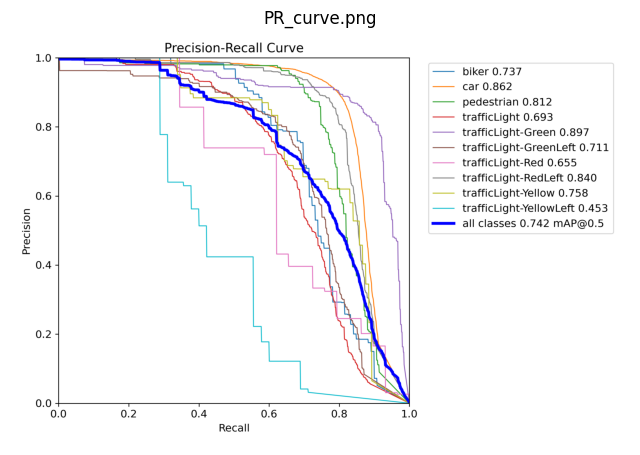

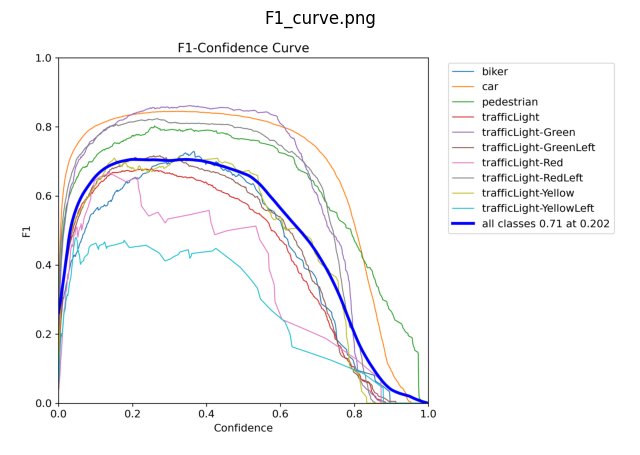

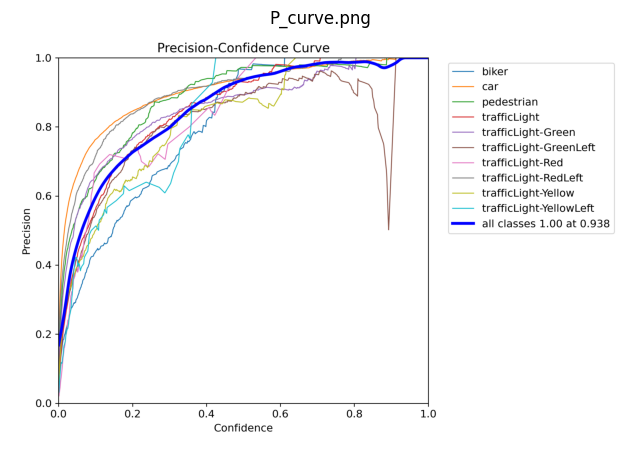

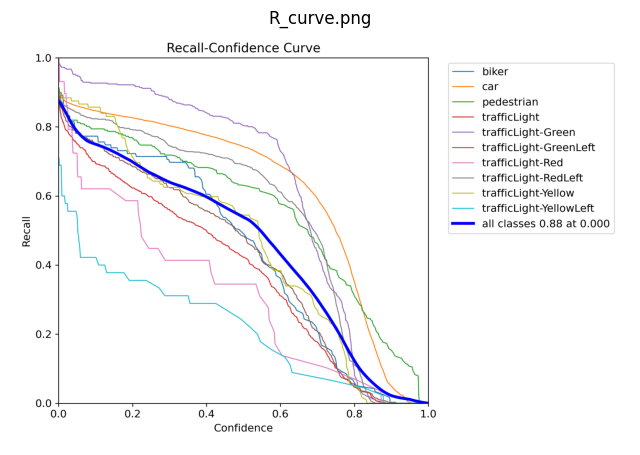

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Filter precision-recall and F1 curve images
curve_files = [file for file in os.listdir(folder_path) if file in ['PR_curve.png', 'F1_curve.png', 'P_curve.png', 'R_curve.png']]

# Display curve metrics
for file_name in curve_files:
    file_path = os.path.join(folder_path, file_name)
    img = mpimg.imread(file_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(file_name)
    plt.axis('off')
    plt.show()


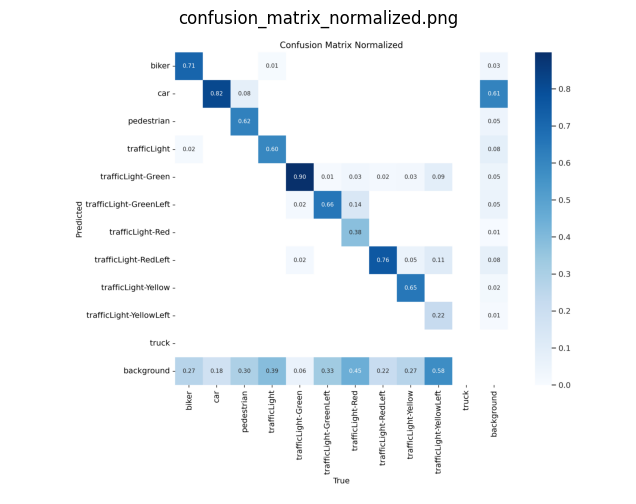

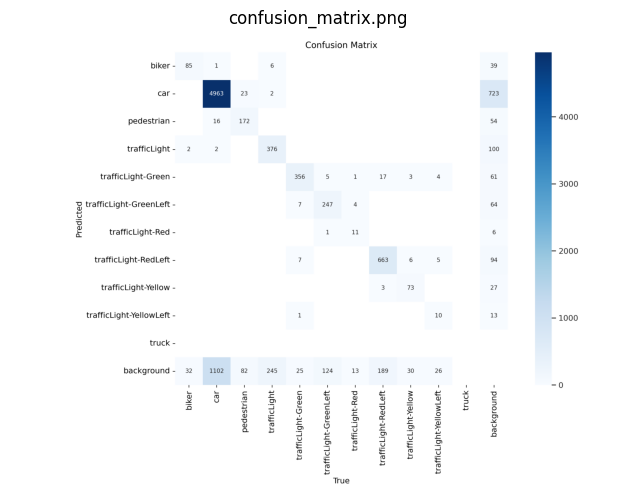

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Filter confusion matrix images
confusion_files = [file for file in os.listdir(folder_path) if 'confusion_matrix' in file]

# Display confusion matrices
for file_name in confusion_files:
    file_path = os.path.join(folder_path, file_name)
    img = mpimg.imread(file_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(file_name)
    plt.axis('off')
    plt.show()


In [ ]:
results = model.predict(source='udacity-car-dataset-1/test/images/1478019957687018435_jpg.rf.2bf9c3de7094f0bf93ada694a92d0afc.jpg', show=True, conf=0.5, imgsz=640)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/dl/udacity-car-dataset-1/test/images/1478019957687018435_jpg.rf.2bf9c3de7094f0bf93ada694a92d0afc.jpg: 640x640 4 cars, 1 pedestrian, 37.1ms
Speed: 2.8ms preprocess, 37.1ms inference, 791.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Test the model on a single image
input_video_path = 'videos/traffic2.mp4'

results = model.predict(source=input_video_path, save=True, imgsz=640)





WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1501) /content/drive/MyDrive/dl/videos/traffic2.mp4: 384x640 8 cars, 118.2ms
video 1/1 (frame 2/1501) /content/drive/MyDrive/dl/videos/traffic2.mp4: 384x640 8 cars, 25.7ms
video 1/1 (frame 3/1501) /content/drive/MyDrive/dl/videos/traffic2.mp4: 384x640 8 cars, 25.2ms
video 1/1 (frame 4/1501) /content/drive/MyDrive/dl/videos/traffic2.mp4: 384x640 7 cars, 25.2ms
video 1/1 (frame 5/1501) /content/drive/MyDrive/dl/videos/traffic2.mp4: 384

Displaying visualizations from: runs/detect/train23


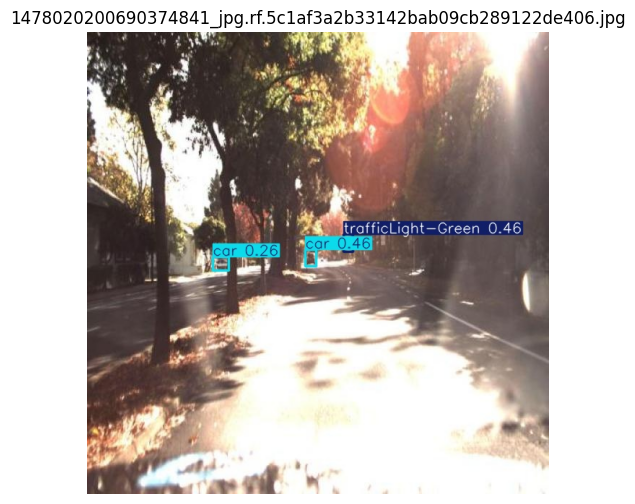

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Root directory where YOLO training results are stored
root_dir = 'runs/detect'

# Get all subdirectories starting with 'train' and sort them by creation time
train_dirs = sorted(
    [d for d in os.listdir(root_dir) if d.startswith('train')],
    key=lambda x: os.path.getctime(os.path.join(root_dir, x))
)

# Get the latest training directory
latest_train_dir = os.path.join(root_dir, train_dirs[-1])  # Picks the newest folder

print(f"Displaying visualizations from: {latest_train_dir}")

# List all PNG files in the latest training folder
visualization_files = [file for file in os.listdir(latest_train_dir) if file.endswith('.png') or file.endswith('.jpg')]

# Display each visualization
for file_name in visualization_files:
    file_path = os.path.join(latest_train_dir, file_name)
    img = mpimg.imread(file_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(file_name)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


In [25]:
import os
from pathlib import Path

# Root directory where YOLO training results are stored
root_dir = 'runs/detect'

# Get all subdirectories starting with 'predict' and sort them by creation time
train_dirs = sorted(
    [d for d in os.listdir(root_dir) if d.startswith('predict')],
    key=lambda x: os.path.getctime(os.path.join(root_dir, x))
)

# Get the latest training directory
predict_folder_path = os.path.join(root_dir, train_dirs[-1])  # Picks the newest folder

print(f"Displaying visualizations from: {predict_folder_path}")

# List all AVI files in the latest training folder
latest_avi_file = [file for file in os.listdir(predict_folder_path) if file.endswith('.avi')]

if len(latest_avi_file) == 0:
    print(f"No .avi files found in the folder: {predict_folder_path}")
else:
    input_video_path = Path(predict_folder_path) / latest_avi_file[0]  # Full path to the .avi file
    output_video_path = input_video_path.with_suffix('.mp4')  # Change extension to .mp4
    print(f"Latest predicted .avi video: {input_video_path}")
    print(f"Converted .mp4 video will be saved at: {output_video_path}")


Displaying visualizations from: runs/detect/predict2
Latest predicted .avi video: runs/detect/predict2/traffic2.avi
Converted .mp4 video will be saved at: runs/detect/predict2/traffic2.mp4


In [26]:
# Convert .avi to .mp4 using ffmpeg
os.system(f"ffmpeg -i {input_video_path} -vcodec libx264 {output_video_path}")
print(f"Video converted and saved at: {output_video_path}")


Video converted and saved at: runs/detect/predict2/traffic2.mp4


In [28]:
from IPython.display import HTML
from base64 import b64encode

def display_video(video_path):
    video_file = open(video_path, "rb").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width=640 controls><source src="{video_url}" type="video/mp4"></video>""")

# Display the converted video
display_video(input_video_path)
